# HW03: Distance and Topic Model

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

## Load and Pre-process Text

In [1]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-15 10:45:55--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  56.7MB/s    in 0.5s    

2023-03-15 10:45:56 (56.7 MB/s) - ‘train.csv’ saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


In [4]:
import spacy
dfs = df.sample(200)
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import TfidfVectorizer

##TODO pre-process text as you did in HW02

dfs['preprocessed'] = dfs['text'].apply(lambda x: nlp(x))

##TODO vectorize the pre-processed text using TfidfVectorizer

vectorizer = TfidfVectorizer()
vec_text = vectorizer.fit_transform(dfs['preprocessed'].astype(str))

## Cosine Similarity and PCA

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
# Cosine_similarity = measure of similarity between two non-zero vectors.
# Used to measure similarity between two documents repr. as vectors of word frequencies or tf-idf weights
# if angle small -> vectors in similar direction -> cosine_sim close to 1 -> high similarity
# if angle close to 90 -> low similarity -> cosine_sim close to 0
# if angle close to 180 -> coseine_sim close to -1 = high dissimilarity
# NLP: find documents that are similar to given query document, or to cluster documents based on similarity

##TODO compute the cosine similarity for the first 200 snippets and for the first snippet, show the three most similar snippets and their respective cosine similarity scores

sim = cosine_similarity(vec_text)

first_snipped = sim[0]

# argsort() sorts in ascending order
# gives back index order in order to sort sim
# 1:4 to exclude the first element being the first snipped itself
top_three_ind = first_snipped.argsort()[::-1][1:4]

print('First snipped:', dfs.iloc[0]['preprocessed'])
print()


for i, index in enumerate(top_three_ind):
    print('{}: {}, similarity score = {}'.format(i+1, dfs.iloc[index]['preprocessed'], first_snipped[index]))


First snipped: T-Mobile Checks in at Red Roof T-Mobile Hotspot #39;s network of public venues with Wi-Fi is extensive and its partners are big names you #39;ve heard of(Starbucks, FedEx Kinko #39;s, Borders Books).

1: Microsoft #39;s  #39;Halo 2 #39; game leaked LOS ANGELES (CBS.MW) -- Microsoft said Friday that a version of its hotly anticipated  quot;Halo 2 quot; video game had been leaked onto various venues on the Internet nearly a month before its planned official release., similarity score = 0.11170032743012519
2: Nintendo Says DS Selling Faster Than Anticipated #39; in US Nintendo Co., the world #39;s biggest maker of hand-held game machines, said US sales of its DS hand-held console were faster than anticipated #39; #39; in the first week., similarity score = 0.1020060538620157
3: Top supercomputer race continues with Nasa/SGI box Engineers at Nasa #39;s Ames Research Center have staked their claim have built the world #39;s fastest supercomputer. At a ribbon-cutting ceremony 

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='randomized')

##TODO reduce the vectorized data using PCA

pca_vec_text = pca.fit_transform(vec_text.toarray())

##TODO compute again cosine similarity with the reduced version for the first 200 snippets

red_cos_sim = cosine_similarity(pca_vec_text)

##TODO for the first snippet, show again its three most similar snippets

first_snipped = red_cos_sim[0]
top_three_ind = first_snipped.argsort()[::-1][1:4]

print('First snipped:', dfs.iloc[0]['preprocessed'])
print()


for i, index in enumerate(top_three_ind):
    print('{}: {}, similarity score = {}'.format(i+1, dfs.iloc[index]['preprocessed'], first_snipped[index]))


First snipped: T-Mobile Checks in at Red Roof T-Mobile Hotspot #39;s network of public venues with Wi-Fi is extensive and its partners are big names you #39;ve heard of(Starbucks, FedEx Kinko #39;s, Borders Books).

1: Deutsche Bank hit again by phishing attack After facing its first-ever phishing attack last week, Deutsche Bank AG said today it was the target of a renewed assault that began late yesterday and continued until this morning., similarity score = 0.9994210247730532
2: Agent: Nothing to Alonzo #39;s return His agent says there #39;s nothing to reports that Alonzo Mourning plans another comeback, the New Jersey Nets say they wouldn #39;t be surprised if he tried and the man himself isn #39;t saying anything., similarity score = 0.9987929761879732
3: Cisco sees China as center of world tech market Cisco Systems, the world #39;s largest maker of equipment for directing Internet traffic says China is well on the way to becoming the world #39;s technology hub., similarity score 

Compare the cosine similarity before and after PCA reduction. Did the results change? 

Yes, the results do differ. PCA reduces dimensionality of data and only preserves the most imporant relationshipds. When applying cos_sim again on the reduced space, some data may have been lost which leads to different results.

## Clustering

In [30]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##TODO create the clusters found with k-medoids clustering nd 5 clusters

kmedoids = KMedoids(n_clusters=5, random_state=0)
kmedoids.fit(pca_vec_text)

dfs['kmedoids_cluster'] = kmedoids.labels_

##TODO create the clusters found with k-means clustering nd 5 clusters

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(pca_vec_text)

dfs['kmeans_cluster'] = kmeans.labels_

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
dfs.head()

,label,title,lead,text,preprocessed,kmedoids_cluster,kmeans_cluster
9044,sci/tech,T-Mobile Checks in at Red Roof,T-Mobile Hotspot #39;s network of public venue...,T-Mobile Checks in at Red Roof T-Mobile Hotspo...,"(T, -, Mobile, Checks, in, at, Red, Roof, T, -...",3,0
89517,world,Prosecutor: Italian PM deserves prison,An Italian prosecutor says that Prime Minister...,Prosecutor: Italian PM deserves prison An Ital...,"(Prosecutor, :, Italian, PM, deserves, prison,...",1,2
16614,sport,Agent: Nothing to Alonzo #39;s return,His agent says there #39;s nothing to reports ...,Agent: Nothing to Alonzo #39;s return His agen...,"(Agent, :, Nothing, to, Alonzo, #, 39;s, retur...",3,0
35418,sport,A position of strength,Who knows? Maybe a year from now when Ty Law i...,A position of strength Who knows? Maybe a year...,"(A, position, of, strength, Who, knows, ?, May...",1,2
113805,world,US pushes for more economic reform in Mideast,This week the US and Egypt plan to sign a trad...,US pushes for more economic reform in Mideast ...,"(US, pushes, for, more, economic, reform, in, ...",2,2


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


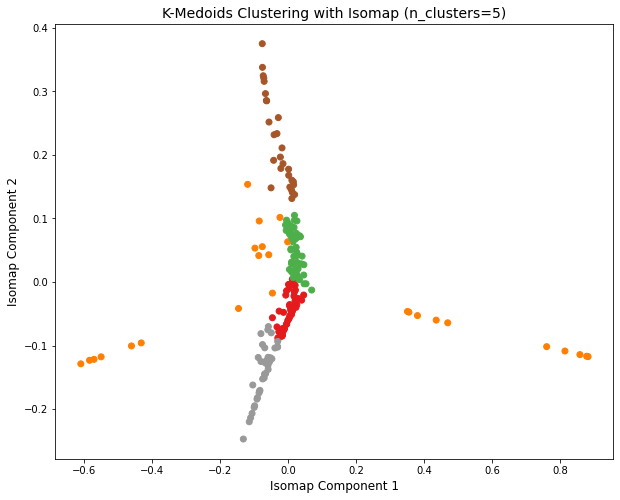

In [32]:
##TODO visualize the k-medoids clustering results through Isomap (first reduce the dimensionality to 2 using Isomap, then use scatter plot (plt.scatter()) to visualize)

from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

iso = Isomap(n_components=2)
iso_vec_text = iso.fit_transform(pca_vec_text)

# Add Isomap components to dataframe
dfs['isomap1'] = iso_vec_text[:,0]
dfs['isomap2'] = iso_vec_text[:,1]



# Scatter plot of k-medoids clusters using Isomap
plt.figure(figsize=(10,8))
plt.scatter(dfs['isomap1'], dfs['isomap2'], c=dfs['kmedoids_cluster'], cmap='Set1')
plt.title('K-Medoids Clustering with Isomap (n_clusters=5)', fontsize=14)
plt.xlabel('Isomap Component 1', fontsize=12)
plt.ylabel('Isomap Component 2', fontsize=12)
plt.show()

In [ ]:
##TODO similarly, visualize the k-means results

## Topic Modeling: LDA

For this part you will need to use LDA Mallet. If you cannot have Mallet run, you can use the simple LDA algorithm 

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

##TODO create a dictionary with the pre-processed tokenized text and filter it according to frequencies and keeping 1000 vocabularies
##TODO create the doc_term_matrix

In [ ]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [ ]:
##TODO train a LDA Mallet model with 5, 10 and 15 topics
##TODO compute the coherence score for each of these model and print the topics from the model with highest coherence score. Then find the opitimal number of topics using the coherence score.

In [ ]:
#!pip install pyLDAvis
import pyLDAvis.gensim
from gensim.models import wrappers
##TODO using LDAvis visualize the topics using the optimal number of topics